In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

# Create Latitude and Longitude Combinations

In [2]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.00, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

611

# Build a Basic URL

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Initialize an empty list and counters, loop through the list of cities and build the city URL, for loop, try-except

In [6]:
# Create an empty list to hold the weather data. 
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 
set_count = 1

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count. 
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data. 
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experienced, skip the city.
    except: 
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kampot
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | north bend
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | havre-saint-pierre
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | pangkalanbuun
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | alwaye
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | georgiyevka
Processing Record 17 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | oktyabrskoye
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | half moon 

Processing Record 34 of Set 4 | namatanai
Processing Record 35 of Set 4 | camacha
Processing Record 36 of Set 4 | coahuayana
Processing Record 37 of Set 4 | souillac
Processing Record 38 of Set 4 | miranda
Processing Record 39 of Set 4 | arraial do cabo
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | rio novo
Processing Record 42 of Set 4 | mergui
City not found. Skipping...
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | rocha
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | birjand
Processing Record 48 of Set 4 | kampong chhnang
Processing Record 49 of Set 4 | honiara
Processing Record 50 of Set 4 | englehart
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | niort
Processing Record 3 of Set 5 | eston
Processing Record 4 of Set 5 | puerto del rosario
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | solnechnyy
Processing Record 7 of

Processing Record 25 of Set 8 | guerrero negro
Processing Record 26 of Set 8 | majene
Processing Record 27 of Set 8 | karratha
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | sitka
Processing Record 30 of Set 8 | utiroa
City not found. Skipping...
Processing Record 31 of Set 8 | komsomolskiy
Processing Record 32 of Set 8 | forest hills
Processing Record 33 of Set 8 | lakki marwat
Processing Record 34 of Set 8 | veghel
Processing Record 35 of Set 8 | puli
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | zhigansk
Processing Record 39 of Set 8 | faya
Processing Record 40 of Set 8 | victoria
Processing Record 41 of Set 8 | kalianget
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | sanand
Processing Record 44 of Set 8 | rute
Processing Record 45 of Set 8 | naushahro firoz
Processing Record 46 of Set 8 | belaya gora
Processing Record 47 of Set 8 | bend
Processing Record 4

Processing Record 10 of Set 12 | kungurtug
Processing Record 11 of Set 12 | escuintla
Processing Record 12 of Set 12 | le moule
Processing Record 13 of Set 12 | khandyga
Processing Record 14 of Set 12 | barkhan
Processing Record 15 of Set 12 | bonthe
Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | sechura
Processing Record 18 of Set 12 | nouakchott
Processing Record 19 of Set 12 | eskasem
City not found. Skipping...
Processing Record 20 of Set 12 | beinamar
Processing Record 21 of Set 12 | liverpool
Processing Record 22 of Set 12 | fare
Processing Record 23 of Set 12 | bardoli
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | tutoia
Processing Record 26 of Set 12 | bantogon
Processing Record 27 of Set 12 | sibu
Processing Record 28 of Set 12 | pachino
Processing Record 29 of Set 12 | arman
Processing Record 30 of Set 12 | paracuru
Processing Record 31 of Set 12 | altay
Processing Record 32 of Set 12 | ishigaki
Processing Record 33 

In [7]:
len(city_data)

554

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kampot,10.6167,104.1833,75.20,88,20,2.30,KH,2021-02-04 19:09:25
1,Barrow,71.2906,-156.7887,-23.80,76,1,3.44,US,2021-02-04 19:09:26
2,North Bend,43.4065,-124.2243,46.40,76,1,4.61,US,2021-02-04 19:05:08
3,San Cristobal,7.7669,-72.2250,89.60,48,20,13.80,VE,2021-02-04 19:09:26
4,Havre-Saint-Pierre,50.2334,-63.5986,35.60,93,90,8.05,CA,2021-02-04 19:09:27
5,Hermanus,-34.4187,19.2345,70.00,73,33,1.01,ZA,2021-02-04 19:09:27
6,Tuatapere,-46.1333,167.6833,47.46,85,50,3.91,NZ,2021-02-04 19:05:13
7,Hilo,19.7297,-155.0900,72.00,78,90,3.44,US,2021-02-04 19:09:29
8,Puerto Ayora,-0.7393,-90.3518,86.00,62,0,5.75,EC,2021-02-04 19:09:29
9,Mataura,-46.1927,168.8643,44.10,86,21,3.94,NZ,2021-02-04 19:09:29


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kampot,KH,2021-02-04 19:09:25,10.6167,104.1833,75.20,88,20,2.30
1,Barrow,US,2021-02-04 19:09:26,71.2906,-156.7887,-23.80,76,1,3.44
2,North Bend,US,2021-02-04 19:05:08,43.4065,-124.2243,46.40,76,1,4.61
3,San Cristobal,VE,2021-02-04 19:09:26,7.7669,-72.2250,89.60,48,20,13.80
4,Havre-Saint-Pierre,CA,2021-02-04 19:09:27,50.2334,-63.5986,35.60,93,90,8.05
...,...,...,...,...,...,...,...,...,...
549,Skala,PL,2021-02-04 19:13:54,50.2305,19.8536,35.60,87,75,3.44
550,Mazyr,BY,2021-02-04 19:13:54,52.0495,29.2456,24.58,95,100,18.25
551,San Policarpo,PH,2021-02-04 19:13:55,12.1791,125.5072,79.68,85,95,16.78
552,Glencoe,ZA,2021-02-04 19:13:56,-28.1783,30.1470,63.97,89,100,3.69


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a c CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs Temperature

## Get data for plotting

In [14]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

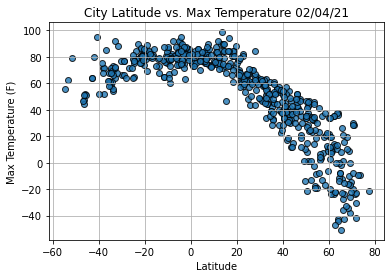

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save tje figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

# Plot Latitude vs Humidity

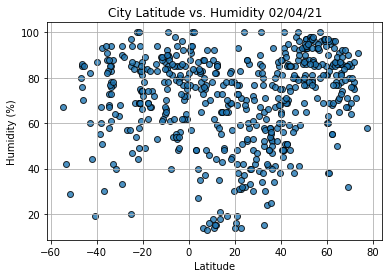

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save tje figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

# Plot Latitude vs. Cloudiness

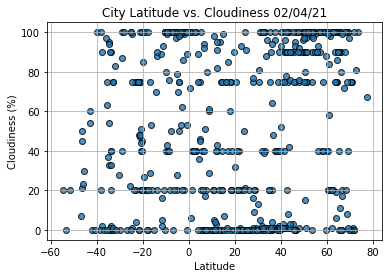

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save tje figure.
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

# Plot Latitude vs Wind Speed

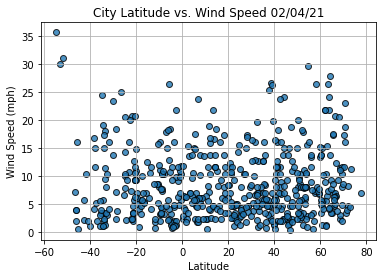

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save tje figure.
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()